In [6]:
library(ncdf4)
library(lattice)
library(rgdal)
library(raster)
library(rasterVis)
library(latticeExtra)
library(gridExtra)
library(RColorBrewer)
library(classInt)

Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 
Loading required package: latticeExtra
Loading required package: RColorBrewer
Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`


In [1]:
path <- '/Users/dongmeichen/Documents/beetle/data/'
out <- '/Users/dongmeichen/Documents/beetle/output/'

In [55]:
i <- 3
model <- paste0('model', i)

In [56]:
preds <- read.csv(paste0(path, model,'/predictions.csv'), stringsAsFactors = FALSE)

In [57]:
head(preds)

x,y,year,btl_t,probs,preds
-450000,-2040000,2015,0,0.0002899391,0
-440000,-2040000,2015,0,0.0005581277,0
-430000,-2040000,2015,0,0.0003768220,0
-420000,-2040000,2015,0,0.0003390466,0
-410000,-2040000,2015,0,0.0003172657,0
-400000,-2040000,2015,0,0.0002761019,0


In [60]:
preds$error <- preds$preds - preds$btl_t

In [21]:
shppath <- "/Users/dongmeichen/Documents/beetle/shp"

In [22]:
canada.prov <- readOGR(dsn = shppath, layer = "na10km_can_prov")
us.states <- readOGR(dsn = shppath, layer = "na10km_us_state")
crs <- proj4string(us.states)

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_can_prov"
with 13 features
It has 2 fields
OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_us_state"
with 51 features
It has 2 fields


In [26]:
lrglakes <- readOGR(dsn = shppath, layer = "na10km_lrglakes")
proj4string(lrglakes) <- crs

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "na10km_lrglakes"
with 24 features
It has 2 fields


In [23]:
get.spdf <- function(year){
    df <- preds[preds$year==year,]
    xy <- data.frame(df[,c(1,2)])
    coordinates(xy) <- c('x', 'y')
    proj4string(xy) <- crs
    spdf <- SpatialPointsDataFrame(coords = xy, data = df, proj4string = crs)
    return(spdf)
}

In [48]:
nclr <- 3
#color <- "Set1"
plotclr <- c('#440154','#208F8B','#FDE724')

In [58]:
probmapping <- function(year){
    spdf <- get.spdf(year)
    #spdf <- spdf[spdf$btl_t ==1 | spdf$preds ==1,]
    plotvar <- spdf$error
    class <- classIntervals(plotvar, nclr, style="equal")
    colcode <- findColours(class, plotclr)
    par(mfrow=c(1,1),mar=c(0.5,0,1.5,0))
    plot(spdf, col=colcode, main=year, pch=19, cex=0.05)
    plot(canada.prov, col=rgb(0.7,0.7,0.7,0.7), add=T)
    plot(us.states, col=rgb(0.7,0.7,0.7,0.7), add=T)
    plot(lrglakes, border=rgb(0,0,0.3,0.1),add=T)
    legend('left',legend=names(attr(colcode, "table")),
            fill=attr(colcode, "palette"), cex=1.2, title='Error', bty="n")
}

In [28]:
year=1998

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

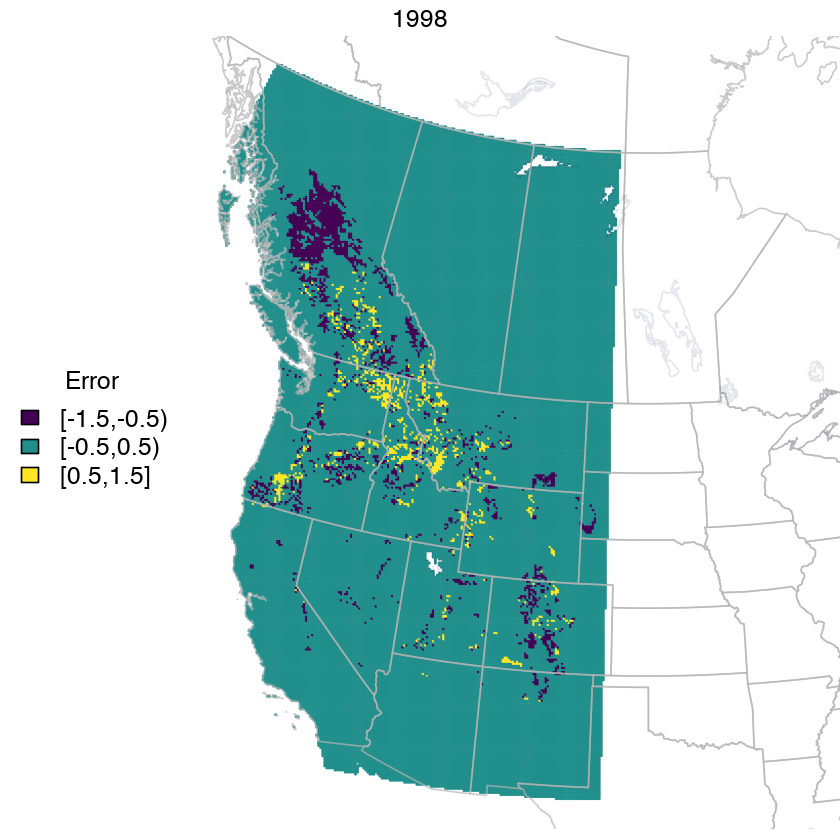

In [61]:
probmapping(year)

In [70]:
probmapping_ts <- function(){
    png(paste0(out, "accuracy.png"), width=12, height=12, units="in", res=300)
    par(mfrow=c(3,6),mar=c(0.5,0.5,1.5,0))
    for (year in 1998:2015){
        spdf <- get.spdf(year)
        plotvar <- spdf$error
        class <- classIntervals(plotvar, nclr, style="equal")
        colcode <- findColours(class, plotclr)
        plot(spdf, col=colcode, pch=15, cex=0.25)
        title(main=year, adj = 0.5, line = -1, cex.main=2)
        plot(canada.prov, col=rgb(0.7,0.7,0.7,0.7), cex=0.3, add=T)
        plot(us.states, col=rgb(0.7,0.7,0.7,0.7), cex=0.3, add=T)
        print(year)
    }
    dev.off()
}

In [71]:
probmapping_ts()

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 1998


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 1999


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2000


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2001


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2002


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2003


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2004


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2005


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2006


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2007


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2008


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2009


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2010


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2011


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2012


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2013


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2014


Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

[1] 2015


pdf 
  2